This notebook is intended for both preliminary design analysis and simulation as well as for data analysis after completion of testing.


The below cell sets up the design parameters for V1 of the test setup.

For this design, the read head will use 3, LTH### optos at a 10.16mm center-to-center spacing (4 holes of separation on standard perfboard). Rise and fall times are based on 

The encoder has cutouts with a nominal width of 2mm on a 4mm center-to-center spacing





In [56]:

d_opto = 7.62 #center-to-center spacing from opto 1 to opto 2
N_opto = 3 #total number of optos in read head

Ncuts = 135 #number of cutouts in encoder
Wnom = 1.00 #nominal width of cutouts
Snom = 2.00 #nominal center-to-center spacing between cutouts

t_rise = 0.000015 #rise time in seconds
t_fall = 0.000020 #fall time in seconds

# Populate dict of each edge location on scale
i = 0
c_loc = 0
edge_locs = {}
while i <= Ncuts:
    if i % 2:
        edge_type = 1
        edge_locs[i] = [edge_type, (i*Wnom)]
    else:
        edge_type = -1
        edge_locs[i] = [edge_type, (i*Wnom)]
    i += 1



In [57]:
print(edge_locs)

{0: [-1, 0.0], 1: [1, 1.0], 2: [-1, 2.0], 3: [1, 3.0], 4: [-1, 4.0], 5: [1, 5.0], 6: [-1, 6.0], 7: [1, 7.0], 8: [-1, 8.0], 9: [1, 9.0], 10: [-1, 10.0], 11: [1, 11.0], 12: [-1, 12.0], 13: [1, 13.0], 14: [-1, 14.0], 15: [1, 15.0], 16: [-1, 16.0], 17: [1, 17.0], 18: [-1, 18.0], 19: [1, 19.0], 20: [-1, 20.0], 21: [1, 21.0], 22: [-1, 22.0], 23: [1, 23.0], 24: [-1, 24.0], 25: [1, 25.0], 26: [-1, 26.0], 27: [1, 27.0], 28: [-1, 28.0], 29: [1, 29.0], 30: [-1, 30.0], 31: [1, 31.0], 32: [-1, 32.0], 33: [1, 33.0], 34: [-1, 34.0], 35: [1, 35.0], 36: [-1, 36.0], 37: [1, 37.0], 38: [-1, 38.0], 39: [1, 39.0], 40: [-1, 40.0], 41: [1, 41.0], 42: [-1, 42.0], 43: [1, 43.0], 44: [-1, 44.0], 45: [1, 45.0], 46: [-1, 46.0], 47: [1, 47.0], 48: [-1, 48.0], 49: [1, 49.0], 50: [-1, 50.0], 51: [1, 51.0], 52: [-1, 52.0], 53: [1, 53.0], 54: [-1, 54.0], 55: [1, 55.0], 56: [-1, 56.0], 57: [1, 57.0], 58: [-1, 58.0], 59: [1, 59.0], 60: [-1, 60.0], 61: [1, 61.0], 62: [-1, 62.0], 63: [1, 63.0], 64: [-1, 64.0], 65: [1, 65.

In [58]:
import numpy as np
x_locs = np.linspace(0, 100, 100000)
dat = {}
state_s1 = 0
state_s2 = 0
state_s3 = 0
vals_s1 = []
vals_s2 = []
vals_s3 = []
hits = []
for loc in x_locs:
    s1 = float(loc)
    s2 = s1 + d_opto
    s3 = s1 + (2 * d_opto)
    if [-1, s1] in edge_locs.values():
        state_s1 = 0
        hits.append(s1)
    if [1, s1] in edge_locs.values():
        state_s1 = 1
        hits.append(s1)
    if [-1, s2] in edge_locs.values():
        state_s2 = 0
        hits.append(s2)
    if [1, s2] in edge_locs.values():
        state_s2 = 1
        hits.append(s2)
    if [-1, s3] in edge_locs.values():
        state_s3 = 0
        hits.append(s3)
    if [1, s3] in edge_locs.values():
        state_s3 = 1
        hits.append(s3)
    vals_s1.append(state_s1)
    vals_s2.append(state_s2)
    vals_s3.append(state_s3)

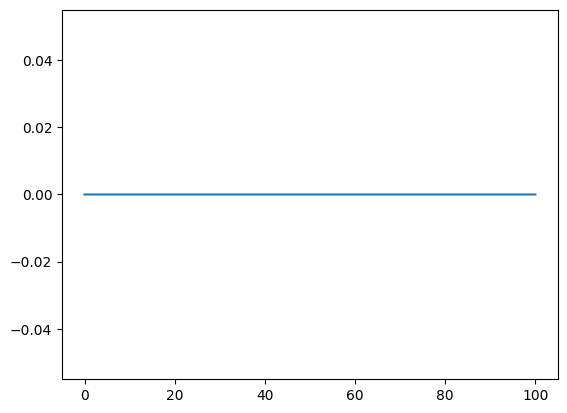

In [59]:
from matplotlib import pyplot as plt
plt.plot(x_locs, vals_s2)

In [60]:
print(hits)

[0.0, 100.0]


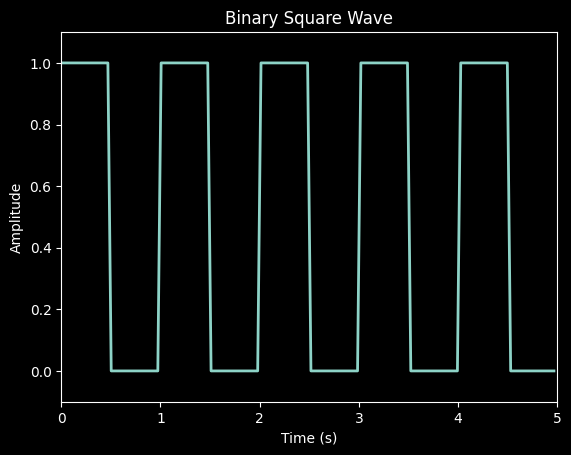

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters for the square wave
frequency = 1  # Frequency in Hz
duty_cycle = 0.5  # Duty cycle as a fraction (0.5 means 50%)
duration = 5  # Duration of the video in seconds
fps = 30  # Frames per second of the video

# Derived parameters
t = np.linspace(0, duration, duration * fps)  # Time vector

# Square wave function
def square_wave(t, frequency, duty_cycle):
    period = 1 / frequency
    return (t % period) < (duty_cycle * period)

# Create a figure for plotting
fig, ax = plt.subplots()
plt.style.use('dark_background')

line, = ax.plot([], [], lw=2, label="Detector 1")
ax.set_ylim(-.1, 1.1)
ax.set_xlim(0, duration)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Binary Square Wave')

# Initialize the plot
def init():
    line.set_data([], [])
    return line,

# Update function for animation
def update(frame):
    current_time = t[:frame]
    current_wave = square_wave(current_time, frequency, duty_cycle)
    line.set_data(current_time, current_wave)
    return line,

# Create the animation
ani = animation.FuncAnimation(
    fig, update, frames=len(t), init_func=init, blit=True, interval=1000/fps
)

# Save the animation as a video
ani.save('/Users/adamjaycox/Documents/Projects/LinEncTester/square_wave_animation.mp4', writer='ffmpeg', fps=fps)
plt.show()


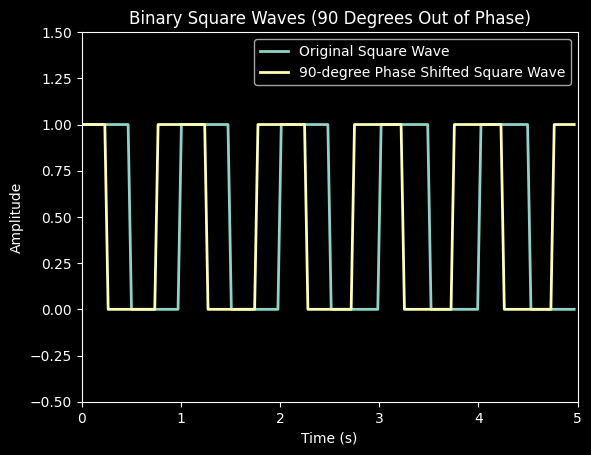

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters for the square wave
frequency = 1  # Frequency in Hz
duty_cycle = 0.5  # Duty cycle as a fraction (0.5 means 50%)
duration = 5  # Duration of the video in seconds
fps = 30  # Frames per second of the video

# Derived parameters
t = np.linspace(0, duration, duration * fps)  # Time vector

# Square wave function
def square_wave(t, frequency, duty_cycle, phase_shift=0):
    period = 1 / frequency
    return ((t + phase_shift) % period) < (duty_cycle * period)

# Phase shift of 90 degrees (1/4 of the period)
phase_shift = (1 / frequency) / 4

# Create a figure for plotting
fig, ax = plt.subplots()
line1, = ax.plot([], [], lw=2, label="Encoder 1")
line2, = ax.plot([], [], lw=2, label="Encoder 2")
ax.set_ylim(-0.5, 1.5)
ax.set_xlim(0, duration)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Amplitude')
ax.set_title('Binary Square Waves (90 Degrees Out of Phase)')
ax.legend()

# Initialize the plot
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    return line1, line2

# Update function for animation
def update(frame):
    current_time = t[:frame]
    current_wave1 = square_wave(current_time, frequency, duty_cycle)
    current_wave2 = square_wave(current_time, frequency, duty_cycle, phase_shift)
    line1.set_data(current_time, current_wave1)
    line2.set_data(current_time, current_wave2)
    return line1, line2

# Create the animation
ani = animation.FuncAnimation(
    fig, update, frames=len(t), init_func=init, blit=True, interval=1000/fps
)

# Save the animation as a video
ani.save('/Users/adamjaycox/Documents/Projects/LinEncTester/square_wave_90deg_phase_animation.mp4', writer='ffmpeg', fps=fps)

plt.show()
